In [1]:
import sys
sys.path.append('/home/s/S.Rasp/repositories/kendapy')
from ekf import Ekf

In [4]:
test_fn = '/project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/fof_20160526000000.nc'

In [6]:
fof = Ekf(test_fn, verbose=True)


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- Ekf : Opening /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/fof_20160526000000.nc...
-- global attributes :
--                     history | 201702191149    COSMO 201605260000 deterministic forecast                       
--                       title | COSMO      Verification Data
--                 institution | -
--                      source | COSMO      -
--         file_version_number |  1.01
--                       n_hdr | 44241
--                      n_body | 323235
--                     n_radar | 0
--       verification_ref_date | 20160526
--       verification_ref_time | 0
--          verification_start | 1
--            verification_end | 1440
--                  resolution | [ 0.025  0.025]
--                 domain_size | [421 461  50]
--                pole_lat_lon | [  40. -170.]
--          lower_left_lat_lon | [-5. -5.]
--         upper_right_lat_l

      ACTIVE          NONE  |        ACTIVE          NONE  |    87169 17792  16997  16997      0      0     55   3355      0      0      0   4521   4521      0      0      0      0      0      0      0      0      0      0      0  13969   4450   4512      0      0 
      ACTIVE          NONE  |       PASSIVE       OBSTYPE  |    48220     0      0      0   1653    119      0      0      0      0      0      0      0      0      0   7825   7696      0   8765   1141   7655   3246   1615   4174      0      0      0   2962   1369 
      ACTIVE          NONE  |      REJECTED     BLACKLIST  |      564   430     34     34      0      0      2      0      0      0      0     16     16      0      0      0      0      0      0      0      0      0      0      0      0     16     16      0      0 
      ACTIVE          NONE  |      REJECTED        HEIGHT  |    85774   105     57     57      0      0    722   1156      0  14275  16417   9669   9669  14225      0      0      0      0      0      0 

    REJECTED     REDUNDANT  |      OBS ONLY          NONE  |     1001     0      0      0      0      0      0      0    504      0      0      0      0      0    496      0      0      1      0      0      0      0      0      0      0      0      0      0      0 
    REJECTED   FLIGHTTRACK  |        ACTIVE          NONE  |       22    16      3      3      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 
    REJECTED   FLIGHTTRACK  |      REJECTED       DATASET  |       16     0      8      8      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 
    REJECTED   FLIGHTTRACK  |      REJECTED            FG  |        2     0      1      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 

In [15]:
# get observations
fkw = {'obstype':'SYNOP', 'varname': 'T2M', 'state':'all'}
obs = fof.obs(param='time', **fkw)

In [16]:
obs.shape

(24507,)

In [17]:
obs

array([  60,   60,   60, ..., 1440, 1440, 1440], dtype=int16)

In [12]:
fc = fof.fg(**fkw)

In [13]:
fc.shape

(24507,)

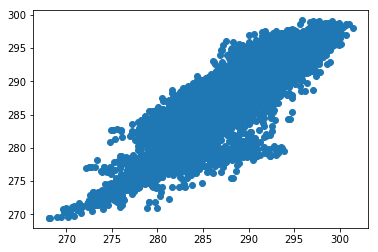

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(obs, fc)

In [20]:
ens_fn = ' /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_ens/20160527000000/ens020/fof_20160527000000.nc'

In [21]:
ens_fof = Ekf(ens_fn, verbose=True)


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- Ekf : Opening  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_ens/20160527000000/ens020/fof_20160527000000.nc...


IOError: No such file or directory

In [25]:
ens_dir = '/project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_ens/20160527000000/ens020/'
!ls $ens_dir

fof_20160527000000.nc  lfff00064500_15	lfff00134500_15  lfff00204500_15
lfff00000000_15        lfff00070000_15	lfff00140000_15  lfff00210000_15
lfff00001500_15        lfff00071500_15	lfff00141500_15  lfff00211500_15
lfff00003000_15        lfff00073000_15	lfff00143000_15  lfff00213000_15
lfff00004500_15        lfff00074500_15	lfff00144500_15  lfff00214500_15
lfff00010000_15        lfff00080000_15	lfff00150000_15  lfff00220000_15
lfff00011500_15        lfff00081500_15	lfff00151500_15  lfff00221500_15
lfff00013000_15        lfff00083000_15	lfff00153000_15  lfff00223000_15
lfff00014500_15        lfff00084500_15	lfff00154500_15  lfff00224500_15
lfff00020000_15        lfff00090000_15	lfff00160000_15  lfff00230000_15
lfff00021500_15        lfff00091500_15	lfff00161500_15  lfff00231500_15
lfff00023000_15        lfff00093000_15	lfff00163000_15  lfff00233000_15
lfff00024500_15        lfff00094500_15	lfff00164500_15  lfff00234500_15
lfff00030000_15        lfff00100000_15	lfff00170000_15  lfff0100

In [26]:
ens_fof = Ekf(ens_dir + 'fof_20160527000000.nc', verbose=True)


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- Ekf : Opening /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_ens/20160527000000/ens020/fof_20160527000000.nc...
-- global attributes :
--                     history | 201709181515    COSMO 201605270000 forecast ensemble member  20                 
--                       title | COSMO      Verification Data
--                 institution | -
--                      source | COSMO      -
--         file_version_number |  1.01
--                       n_hdr | 19034
--                      n_body | 72265
--                     n_radar | 0
--       verification_ref_date | 20160527
--       verification_ref_time | 0
--          verification_start | 1
--            verification_end | 1440
--                  resolution | [ 0.025  0.025]
--                 domain_size | [421 461  50]
--                pole_lat_lon | [  40. -170.]
--          lower_left_lat_lon | [-5. -5.]
--         upper_rig

      ACTIVE          NONE  |        ACTIVE          NONE  |    54076 17309  16632  16632      0     24     24      0      0      0     57   3398 
      ACTIVE          NONE  |       PASSIVE       OBSTYPE  |       48     0      0      0      0      0      0     23     25      0      0      0 
      ACTIVE          NONE  |      REJECTED     BLACKLIST  |      801   653     74     74      0      0      0      0      0      0      0      0 
      ACTIVE          NONE  |      REJECTED        HEIGHT  |     2274    74     60     60     24      0      0      0      0     35    764   1257 
      ACTIVE          NONE  |      REJECTED      PRACTICE  |        4     0      0      0      0      0      0      0      0      0      4      0 
      ACTIVE          NONE  |      REJECTED       DATASET  |     2104     0   1052   1052      0      0      0      0      0      0      0      0 
      ACTIVE          NONE  |      REJECTED         GROSS  |       20     0      0      0      0      0      0      0 